In [414]:
import pandas as pd
import numpy as np

# Housing Price in Beijing
### Contain 
    1. Linear Regression
    2. Robust Regression
    3. Ridge Regression
    4. Lasso Regression
    5. ElasticNet


In [415]:
#using encoding iso-8859-1 because....
#At start we got this Error:  Solve DtypeWarning: Columns (X,X) have mixed types. Specify dtype option on import or set low_memory=False in Pandas.
#it basically means that we are loading in a CSV that has a column that consists out of multiple dtypes. For example: 1,5,a,b,c,3,2,a has a mix of strings and integers. 
#using low_memory = False, will basically telling Pandas not to be efficient, and process the whole file, all at once.

df = pd.read_csv('E:\Wahyudi Prasidhatama\Data Engineering\Kaggle Exercise\Housing Price in Beijing\housing_price_beijing.csv',encoding = 'iso-8859-1', low_memory = False)
df.head(10)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,...,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,https://bj.lianjia.com/chengjiao/101087292623....,101087292623,116.482586,39.891991,1111027380683,2016-07-14,851.0,167,275.0,37672,...,4.0,1997,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,https://bj.lianjia.com/chengjiao/101087303800....,101087303800,116.453917,39.881534,1111027381879,2016-09-07,904.0,138,800.0,49521,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,https://bj.lianjia.com/chengjiao/101087463212....,101087463212,116.555729,40.162058,1111027379605,2016-09-04,873.0,218,134.0,27917,...,3.0,2009,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,https://bj.lianjia.com/chengjiao/101087508625....,101087508625,116.453086,39.898397,1111027374519,2016-09-05,865.0,134,380.0,55883,...,1.0,2009,4,6,0.308,1.0,1.0,1.0,1,78590.0


In [416]:
#df['floor'].value_counts()

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [418]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [419]:
#we use corr() function to find correlation between column in linear model increase in 
#x = increase/decrease in y , will result in 1 or -1, 
#no correlation means 0

df.corr()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
Lng,1.000000,0.040847,-0.007301,-0.014274,-0.012846,-0.069831,-0.153212,0.064499,0.059142,0.008718,-0.005859,0.041754,0.002027,0.044275,0.009599,-0.015972,0.223282,-0.175197
Lat,0.040847,1.000000,-0.000257,0.022363,-0.005676,0.019969,-0.052004,0.119889,-0.000721,0.099777,0.011923,-0.157967,-0.000197,-0.102542,0.009689,-0.077373,0.308592,-0.068064
Cid,-0.007301,-0.000257,1.000000,0.000952,0.001264,0.000071,-0.000387,-0.000413,-0.002429,0.006176,-0.001008,0.001097,-0.000019,-0.000505,-0.008716,0.000992,-0.004429,-0.005487
DOM,-0.014274,0.022363,0.000952,1.000000,0.465489,0.225404,0.215473,0.080909,0.010662,-0.010857,0.152300,0.025380,-0.001083,0.023424,-0.044317,0.010079,-0.001235,0.026475
followers,-0.012846,-0.005676,0.001264,0.465489,1.000000,0.152681,0.257173,-0.050814,0.007651,0.010707,0.241108,-0.022586,-0.000200,-0.020761,0.049632,0.018243,-0.032447,-0.012286
totalPrice,-0.069831,0.019969,0.000071,0.225404,0.152681,1.000000,0.622658,0.575843,0.081393,-0.060346,0.250890,0.188114,-0.001063,0.192345,-0.003225,0.113183,0.010315,0.421428
price,-0.153212,-0.052004,-0.000387,0.215473,0.257173,0.622658,1.000000,-0.164734,0.013289,-0.048676,0.294859,0.042889,0.001107,0.050528,0.014151,0.232571,0.034186,0.683768
square,0.064499,0.119889,-0.000413,0.080909,-0.050814,0.575843,-0.164734,1.000000,0.087816,-0.013511,0.031502,0.156217,-0.002420,0.168131,-0.018164,-0.094973,-0.007301,-0.146136
kitchen,0.059142,-0.000721,-0.002429,0.010662,0.007651,0.081393,0.013289,0.087816,1.000000,0.013062,-0.009705,-0.010838,0.000124,-0.005167,0.045779,0.010617,-0.033746,0.024271
buildingType,0.008718,0.099777,0.006176,-0.010857,0.010707,-0.060346,-0.048676,-0.013511,0.013062,1.000000,-0.011312,-0.535491,-0.000017,-0.630052,-0.000532,-0.147666,0.043837,-0.089884


In [420]:
#since we want to know Housing Price, we have to choose fromm corr() list, some variable that has significance correlated value ( >0) wit totalPrice
#pay attention to variable that have integer value, like 1, 2, 3, 4. It can be a code for another description

df = df[['square','price','totalPrice','communityAverage','renovationCondition']]

df.head(10)

,square,price,totalPrice,communityAverage,renovationCondition
0,131.00,31680,415.0,56021.0,3
1,132.38,43436,575.0,71539.0,4
2,198.00,52021,1030.0,48160.0,3
3,134.00,22202,297.5,51238.0,1
4,81.00,48396,392.0,62588.0,2
5,53.00,52000,275.6,67738.0,3
6,73.00,37672,275.0,50112.0,4
7,161.55,49521,800.0,71539.0,4
8,48.00,27917,134.0,44235.0,1
9,68.00,55883,380.0,78590.0,4


## Dealing with Missing Data

In [421]:
df.isna().values.any()

#df.isna().values.any()

True

In [422]:
df.mean()

square                    83.240597
price                  43530.436379
totalPrice               349.030201
communityAverage       63682.446305
renovationCondition        2.606330
dtype: float64

In [423]:
#to visualize the missing data 

df_nan_filt = df.isna().any(axis=1)

df1 = df[df_nan_filt]

df1.head(20)

,square,price,totalPrice,communityAverage,renovationCondition
2027,90.10,139290,1255.0,NaN,3
3902,45.92,51830,238.0,NaN,4
4982,70.64,41195,291.0,NaN,4
5809,16.00,110000,176.0,NaN,3
6088,97.89,39024,382.0,NaN,4
6334,61.59,77286,476.0,NaN,4
6434,108.58,69903,759.0,NaN,3
6675,13.70,130657,179.0,NaN,1
6888,15.50,138710,215.0,NaN,2
7244,240.00,110417,2650.0,NaN,4


In [424]:
df.isna().values.any()

True

In [425]:
#lets fill all the NaN values with mean values, so the distribution of the value is balanced
df = df.fillna(df.mean())

df.head(10)

,square,price,totalPrice,communityAverage,renovationCondition
0,131.00,31680,415.0,56021.0,3
1,132.38,43436,575.0,71539.0,4
2,198.00,52021,1030.0,48160.0,3
3,134.00,22202,297.5,51238.0,1
4,81.00,48396,392.0,62588.0,2
5,53.00,52000,275.6,67738.0,3
6,73.00,37672,275.0,50112.0,4
7,161.55,49521,800.0,71539.0,4
8,48.00,27917,134.0,44235.0,1
9,68.00,55883,380.0,78590.0,4


In [426]:
df.isna().values.any()

False

## Splitting Training and Test Data


In [427]:
#First we make targetPrice as target data
#Then we split the data into train and test

X = df.drop('totalPrice', axis=1)
y = df['totalPrice']

In [428]:
from sklearn.model_selection import train_test_split

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


print(y_test)

208318    177.0
226271    204.0
68749     280.0
267758    382.0
212893    235.0
          ...  
23629     287.0
100362    165.0
282242    144.8
225866    210.0
64364     539.0
Name: totalPrice, Length: 63771, dtype: float64


## Metrics for testing model's performance

In [430]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [431]:
#we can create empty datframe for append the metric

#make empty dataframe

results_df = pd.DataFrame()
df_columns = ['model','val_score','mae','mse','rmse','r2']
    
def evaluate(actual, predicted):
    
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r2_square = metrics.r2_score(actual, predicted)
    
    return mae, mse, rmse, r2_square

In [432]:
def append_results(model_name, model, c, y_test, pred):
    
    #data=[model_name, *evaluate(y_test, pred),cross_val_score(model, X, y, cv=10).mean()]
    
    results_append_df = pd.DataFrame(data =
                                     [[model_name,cross_val_score(model, X, y, cv=10).mean(),*evaluate(y_test, pred)
                                       ]],columns=df_columns)
    
    a = c.append(results_append_df, ignore_index = True)
    
    return a


## Linear Regression 

In [433]:
from sklearn.linear_model import LinearRegression


#Training
#Create LinearRegression object
lin_reg = LinearRegression()

#Create LinearRegression object and fit into training data
training = lin_reg.fit(X_train, y_train)

# predict the response for data test 
pred = lin_reg.predict(X_test)


#only need to calling the append_result function on Line 120
results_df = append_results('Linear Regression', LinearRegression(), results_df, y_test, pred)

results_df

C:\Users\Wahyudi Prasidhatama\AppData\Local\Temp\ipykernel_18360\20818912.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = c.append(results_append_df, ignore_index = True)


,model,val_score,mae,mse,rmse,r2
0,Linear Regression,0.772644,46.996668,6876.618016,82.925376,0.870069


In [434]:
cvs = cross_val_score(LinearRegression(), X, y, cv=10)

print(cvs)

[ 0.85648912  0.82075472  0.78481479 -0.02176544  0.88414936  0.9231483
  0.85154905  0.9111234   0.86856261  0.84761212]


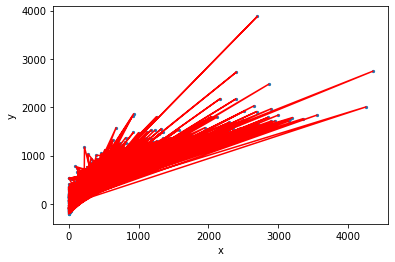

In [435]:
from matplotlib import pyplot as plt

# plotting values
plt.scatter(y_test, pred, s=5)
plt.xlabel('x')
plt.ylabel('y')
 
    
# predicted values
plt.plot(y_test, pred, color='r')
plt.show()

## Robust Regression

In [436]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)

robust_pred = model.predict(X_test)

results_df = append_results('Robust Regression', RANSACRegressor(),results_df, y_test, robust_pred)

results_df


C:\Users\Wahyudi Prasidhatama\AppData\Local\Temp\ipykernel_18360\20818912.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = c.append(results_append_df, ignore_index = True)


,model,val_score,mae,mse,rmse,r2
0,Linear Regression,0.772644,46.996668,6876.618016,82.925376,0.870069
1,Robust Regression,0.794621,48.536832,7547.524893,86.876492,0.857393


## Ridge Regression

In [437]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

ridge_pred = model.predict(X_test)

results_df = append_results("Ridge Regression",  Ridge(), results_df, y_test, ridge_pred)

results_df



C:\Users\Wahyudi Prasidhatama\AppData\Local\Temp\ipykernel_18360\20818912.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = c.append(results_append_df, ignore_index = True)


,model,val_score,mae,mse,rmse,r2
0,Linear Regression,0.772644,46.996668,6876.618016,82.925376,0.870069
1,Robust Regression,0.794621,48.536832,7547.524893,86.876492,0.857393
2,Ridge Regression,0.772644,46.996668,6876.618011,82.925376,0.870069


## Lasso Regression

In [438]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

lasso_pred = model.predict(X_test)

results_df = append_results("Lasso Regression",  Lasso(), results_df, y_test, lasso_pred)

results_df

C:\Users\Wahyudi Prasidhatama\AppData\Local\Temp\ipykernel_18360\20818912.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = c.append(results_append_df, ignore_index = True)


,model,val_score,mae,mse,rmse,r2
0,Linear Regression,0.772644,46.996668,6876.618016,82.925376,0.870069
1,Robust Regression,0.794621,48.536832,7547.524893,86.876492,0.857393
2,Ridge Regression,0.772644,46.996668,6876.618011,82.925376,0.870069
3,Lasso Regression,0.772706,46.963584,6876.969334,82.927494,0.870062


## ElasticNet 

In [440]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)

elasticnet_pred = model.predict(X_test)

results_df = append_results("ElasticNet Regression",  ElasticNet(), results_df, y_test, elasticnet_pred)

results_df

C:\Users\Wahyudi Prasidhatama\AppData\Local\Temp\ipykernel_18360\20818912.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = c.append(results_append_df, ignore_index = True)


,model,val_score,mae,mse,rmse,r2
0,Linear Regression,0.772644,46.996668,6876.618016,82.925376,0.870069
1,Robust Regression,0.794621,48.536832,7547.524893,86.876492,0.857393
2,Ridge Regression,0.772644,46.996668,6876.618011,82.925376,0.870069
3,Lasso Regression,0.772706,46.963584,6876.969334,82.927494,0.870062
4,ElasticNet Regression,0.772814,46.943327,6878.173851,82.934757,0.870040
